# Imports

Import the required packages and configure the plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas_plink import read_plink
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer

plt.style.use('../data/whitegrid.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

# Data

Read the processed plink file:

In [4]:
(bim, fam, G) = read_plink("../data/preprocessed/wolvesadmix/wolvesadmix")


Mapping files: 100%|██████████| 3/3 [00:00<00:00, 14.62it/s]


Switch counted allele:

In [5]:
Y = 2 - np.array(G).T
n, p = Y.shape

print(n, p)

111 17729


# Visualize

Compute allele frequencies and genotype frequencies:

In [6]:
f = np.nansum(Y, axis=0) / (2.0*n)
f_aa = np.nansum(Y==0, axis=0) / n
f_Aa = np.nansum(Y==1, axis=0) / n
f_AA = np.nansum(Y==2, axis=0) / n

Compute SNP and sample missingness:

In [7]:
snp_miss = np.sum(np.isnan(Y), axis=0) / n
ind_miss = np.sum(np.isnan(Y), axis=1) / p

Viz:

Text(0.5, 0, 'Missingness per sample')

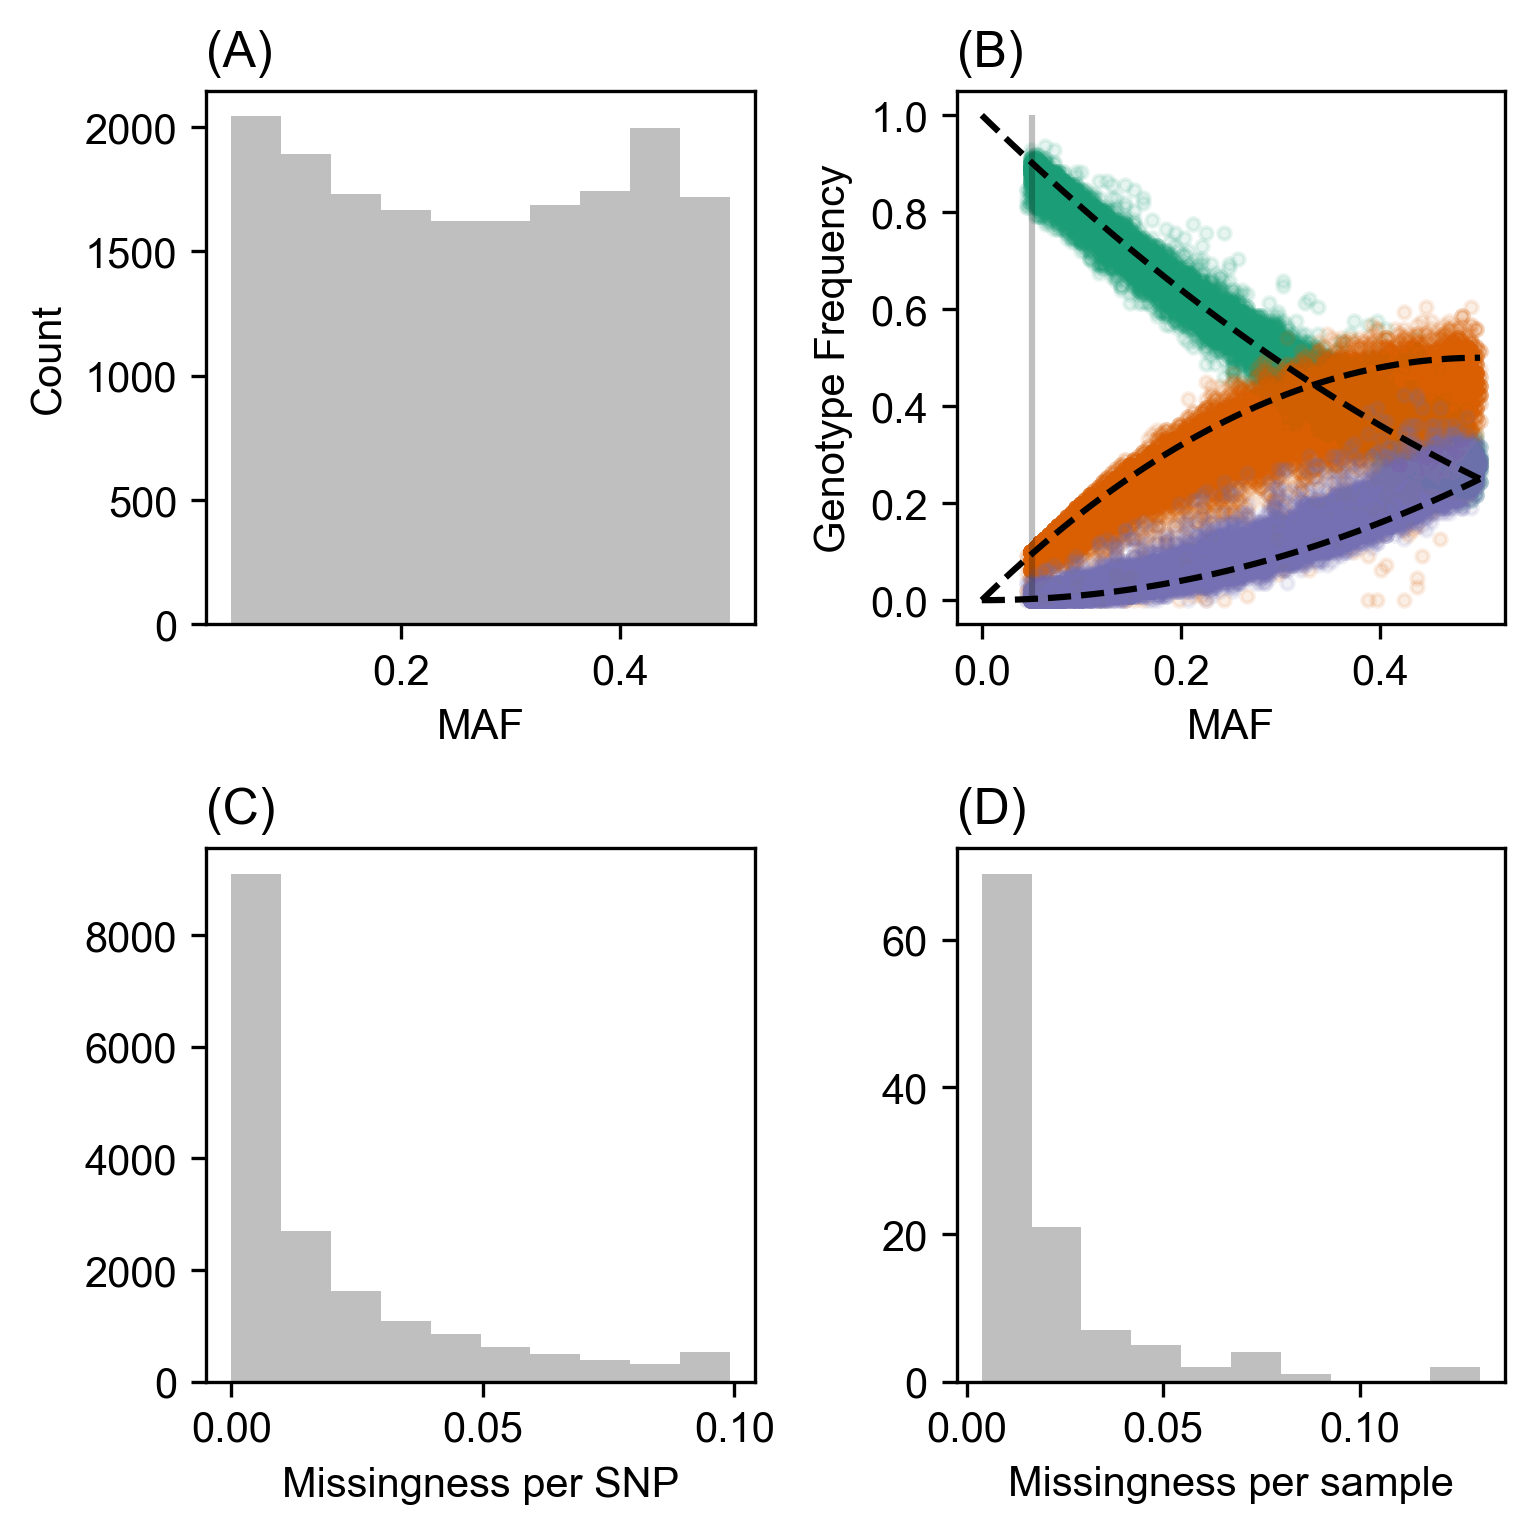

In [10]:
fig = plt.figure(constrained_layout=True, dpi=300, figsize=(5, 5))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

# SFS
f_ax1 = fig.add_subplot(spec[0, 0])
plt.title("(A)", loc="left")

plt.hist(f, color="gray", alpha=.5);
plt.xlabel("MAF")
plt.ylabel("Count")

# HWE
f_ax2 = fig.add_subplot(spec[0, 1])
plt.title("(B)", loc="left")

x = np.linspace(0, .5)
plt.scatter(f, f_aa, alpha=.1, marker=".", color="#1b9e77", zorder=0)
plt.plot(x, (1-x)**2, "--", color="black", zorder=1) 
plt.scatter(f, f_Aa, alpha=.1, marker=".", color="#d95f02", zorder=0)
plt.plot(x, 2*x*(1-x), "--", color="black", zorder=1) 
plt.scatter(f, f_AA, alpha=.1, marker=".", color="#7570b3", zorder=0)
plt.plot(x, x**2, "--", color="black", zorder=1) 
plt.xlabel("MAF");
plt.ylabel("Genotype Frequency");
plt.vlines(ymin=0, ymax=1, x=.05, linestyles="-", alpha=.25)

# Missing per snp
f_ax3 = fig.add_subplot(spec[1, 0])
plt.title("(C)", loc="left")
plt.hist(snp_miss, color="gray", alpha=.5)
plt.xlabel("Missingness per SNP")

# Missing per ind
f_ax4 = fig.add_subplot(spec[1, 1])
plt.title("(D)", loc="left")
plt.hist(ind_miss, color="gray", alpha=.5)
plt.xlabel("Missingness per sample")

In [11]:
fig.savefig(
    "../output/figures/supp-figure-5-snp-sample-qc.pdf", bbox_inches="tight"
)